# Exemplo de tratamento de dados: Steam

### Aqui existe uma lógica, na qual cada game possui um número de cartas para fechar um 'set'. Cada pacote de booster gera 3 cartas aleatórias deste set. Tanto os boosters quanto as cartas podem ser vendidas individualmente

In [1]:
import pandas as pd

dados = pd.read_csv('STC_set_data.csv')
dados.head()

,Game,# Owned,# Unique,# Cards,Badge Lvl,Set Price,Price Diff,Card Avg,Booster Avg,Booster %,Emote Avg,BG Avg,Avg Qty,Discount,Added,AppId
0,City Game Studio,0,0,12,0,1.25,1.25,0.10,NaN,0.0,0.00,0.00,17,0.52,2019-10-24,726840
1,Transport Services,0,0,5,0,1.85,1.85,0.37,NaN,0.0,0.00,0.00,4,0.97,2019-10-23,993690
2,Deadly Days,0,0,10,0,0.78,0.78,0.08,NaN,0.0,0.00,0.00,26,0.35,2019-10-22,740080
3,Moons of Madness,0,0,6,0,0.75,0.75,0.12,0.17,-41.7,0.00,0.00,36,0.31,2019-10-22,1012840
4,NEKO-NIN exHeart 3,0,0,6,0,1.00,1.00,0.17,0.18,-5.9,1.34,5.56,45,0.44,2019-10-21,1129250


In [2]:
qnt_de_itens_inicial = dados.shape[0]
qnt_de_itens_inicial

9156

## Remover os dados inúteis para o tratamento (trabalharemos com cartas e boosters)

In [3]:
dados = dados.drop(["# Owned", "# Unique", "Badge Lvl", "Emote Avg", "BG Avg", "Added", "Discount"], axis=1)
dados.head()

,Game,# Cards,Set Price,Price Diff,Card Avg,Booster Avg,Booster %,Avg Qty,AppId
0,City Game Studio,12,1.25,1.25,0.10,NaN,0.0,17,726840
1,Transport Services,5,1.85,1.85,0.37,NaN,0.0,4,993690
2,Deadly Days,10,0.78,0.78,0.08,NaN,0.0,26,740080
3,Moons of Madness,6,0.75,0.75,0.12,0.17,-41.7,36,1012840
4,NEKO-NIN exHeart 3,6,1.00,1.00,0.17,0.18,-5.9,45,1129250


## Verificar os tipos presentes nas colunas estão aceitáveis:

In [4]:
formato_dos_dados = dados.dtypes
formato_dos_dados

Game            object
# Cards          int64
Set Price       object
Price Diff      object
Card Avg       float64
Booster Avg    float64
Booster %       object
Avg Qty          int64
AppId            int64
dtype: object

#### É necessário fazer as seguintes conversões de tipos para trabalhar:
- 1. 'Set Price', 'Price Diff' e 'Booster %' devem ser do tipo float. Para Evitar erro de conversão é necessário substituir o caractere ',' por '' (espaço vazio)
- 2. 'AppId' por ser um código de identificação deve ser do tipo string para evitar problemas

In [5]:
def remove_virgula_perdida(sentenca): # aqui estamos esvitando um erro de conversão
    sentenca = sentenca.replace(',','')
    return sentenca

In [6]:
para_float = ['Set Price', 'Price Diff', 'Booster %']

for coluna in dados[para_float]:
    dados[coluna] = dados[coluna].apply(remove_virgula_perdida)
    
dados[para_float] = dados[para_float].astype('float64')
dados['AppId'] = dados['AppId'].astype('object')

In [7]:
dados.dtypes

Game            object
# Cards          int64
Set Price      float64
Price Diff     float64
Card Avg       float64
Booster Avg    float64
Booster %      float64
Avg Qty          int64
AppId           object
dtype: object

In [8]:
dados.head()

,Game,# Cards,Set Price,Price Diff,Card Avg,Booster Avg,Booster %,Avg Qty,AppId
0,City Game Studio,12,1.25,1.25,0.10,NaN,0.0,17,726840
1,Transport Services,5,1.85,1.85,0.37,NaN,0.0,4,993690
2,Deadly Days,10,0.78,0.78,0.08,NaN,0.0,26,740080
3,Moons of Madness,6,0.75,0.75,0.12,0.17,-41.7,36,1012840
4,NEKO-NIN exHeart 3,6,1.00,1.00,0.17,0.18,-5.9,45,1129250


## É possível observar na tabela que alguns valores de 'Booster Avg' não estão presentes o que afeta diretamente a nossa análise. Portanto, faremos uma separação destes dados NaN para comparar

In [9]:
dist_valores_boosters = dados['Booster Avg'].value_counts(normalize = True, dropna = False)
dist_valores_boosters.head(10)

0.03    0.150939
0.04    0.125382
NaN     0.090105
0.05    0.086501
0.06    0.063893
0.08    0.042267
0.09    0.038008
0.02    0.033967
0.10    0.032438
0.07    0.032219
Name: Booster Avg, dtype: float64

9% não possuem dados de entrada de média de booster, isso acontece por eles estarem raros, não possuindo ofertas no mercado

In [10]:
dados['Booster on Market'] = ~dados['Booster Avg'].isnull()

In [11]:
dados.head()

,Game,# Cards,Set Price,Price Diff,Card Avg,Booster Avg,Booster %,Avg Qty,AppId,Booster on Market
0,City Game Studio,12,1.25,1.25,0.10,NaN,0.0,17,726840,False
1,Transport Services,5,1.85,1.85,0.37,NaN,0.0,4,993690,False
2,Deadly Days,10,0.78,0.78,0.08,NaN,0.0,26,740080,False
3,Moons of Madness,6,0.75,0.75,0.12,0.17,-41.7,36,1012840,True
4,NEKO-NIN exHeart 3,6,1.00,1.00,0.17,0.18,-5.9,45,1129250,True


In [12]:
dados_nulos = dados[dados['Booster Avg'].isnull()]
dados_reais = dados[~dados['Booster Avg'].isnull()]

In [13]:
import seaborn as sns

# Análise 1: Vamos começar comparando os reais e nulos:

In [14]:
round(dados_nulos.describe(),2)

,# Cards,Set Price,Price Diff,Card Avg,Booster Avg,Booster %,Avg Qty
count,825.00,825.00,825.00,825.00,0.0,825.0,825.00
mean,6.78,6.63,6.63,1.08,NaN,0.0,19.10
std,2.19,108.19,108.19,18.06,NaN,0.0,14.57
min,5.00,0.35,0.35,0.05,NaN,0.0,1.00
25%,5.00,0.78,0.78,0.12,NaN,0.0,11.00
50%,6.00,1.09,1.09,0.17,NaN,0.0,17.00
75%,8.00,1.60,1.60,0.26,NaN,0.0,24.00
max,15.00,3065.79,3065.79,510.97,NaN,0.0,186.00


Não há motivos para mantermos as colunas 'Booster Avg' e 'Booster %' nesta análise pois ambos são nulos, então como critério de comparação será removido da tabela de reais também. O price Diff também é dependente de um desses valores anulados, logo remove-se também

In [15]:
dados_nulos_reduzidos = dados_nulos.drop(["Booster Avg", "Booster %", "Price Diff"], axis=1)
dados_reais_reduzidos = dados_reais.drop(["Booster Avg", "Booster %", "Price Diff"], axis=1)

In [16]:
dados_nulos_reduzidos.describe().round(2)

,# Cards,Set Price,Card Avg,Avg Qty
count,825.00,825.00,825.00,825.00
mean,6.78,6.63,1.08,19.10
std,2.19,108.19,18.06,14.57
min,5.00,0.35,0.05,1.00
25%,5.00,0.78,0.12,11.00
50%,6.00,1.09,0.17,17.00
75%,8.00,1.60,0.26,24.00
max,15.00,3065.79,510.97,186.00


In [17]:
dados_reais_reduzidos.describe().round(2)

,# Cards,Set Price,Card Avg,Avg Qty
count,8331.00,8331.00,8331.00,8331.00
mean,6.92,0.71,0.11,294.79
std,2.32,2.98,0.51,1210.38
min,4.00,0.24,0.03,2.00
25%,5.00,0.37,0.06,32.00
50%,6.00,0.48,0.07,67.00
75%,8.00,0.77,0.11,163.00
max,15.00,192.61,38.52,68369.00


In [18]:
def compare_boxplot(item_de_comparacao):
    ax = sns.boxplot(y=item_de_comparacao, x='Booster on Market', data=dados, orient='v', width=0.5, showfliers=False)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(item_de_comparacao, fontsize=20)
    ax.set_ylabel(item_de_comparacao, fontsize=16)
    ax.set_xlabel('Existe', fontsize=16)
    ax

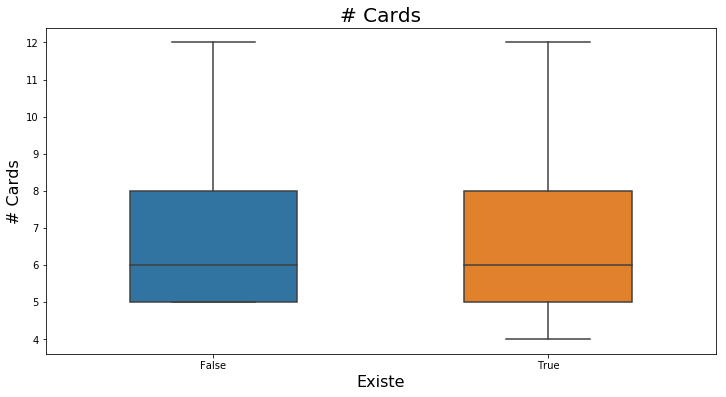

In [19]:
compare_boxplot('# Cards')

Aqui não vemos praticamente nenhuma diferença

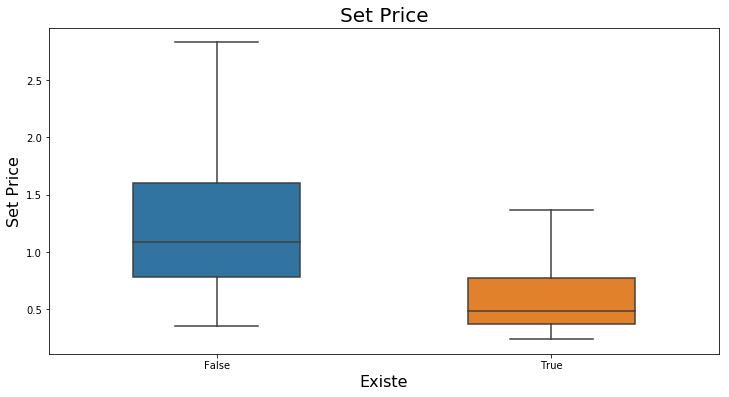

In [20]:
compare_boxplot('Set Price')

Aqui já observamos que as cartas 'em falta' tem um preço de completar mais caras

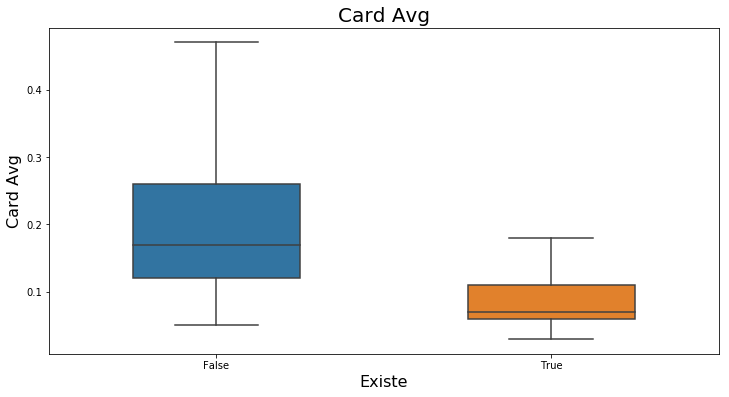

In [21]:
compare_boxplot('Card Avg')

Do mesmo modo que a observação anterior, esta é a média total, ou seja, quanto menos oferta, maior o valor

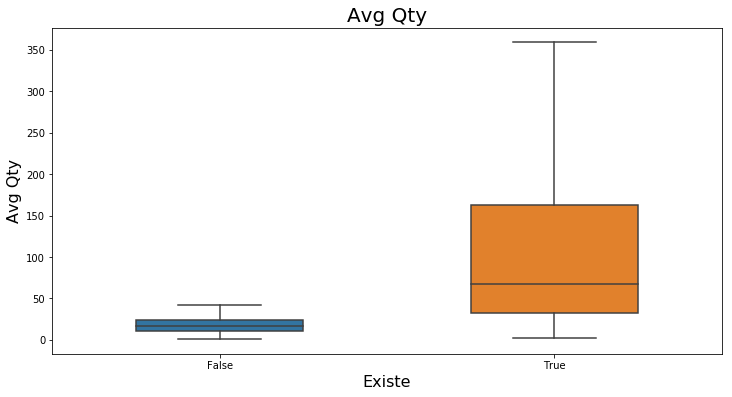

In [22]:
compare_boxplot('Avg Qty')

Neste caso notamos que a escasses de booster provoca uma escasses geral nas cartas

## Conclusão 1 da análise: 
- Os pacotes em falta no mercado fazem com que os preços dos produtos aumentem: menor oferta, maior o valor.
- Também observamos que uma escassez de boosters interfira diretamente com a quantidade de cartas circulando no mercado.

# Análise 2: Trabalhando com dados não nulos:
## Quero saber se é válido o comércio de boosters (comprar, abrir e revender)

In [23]:
dados_reais = dados[~dados['Booster Avg'].isnull()].drop(["Booster on Market", "AppId"], axis=1).reset_index(drop=True)
dados_reais.head()

,Game,# Cards,Set Price,Price Diff,Card Avg,Booster Avg,Booster %,Avg Qty
0,Moons of Madness,6,0.75,0.75,0.12,0.17,-41.7,36
1,NEKO-NIN exHeart 3,6,1.00,1.00,0.17,0.18,-5.9,45
2,Tangle Tower,11,8.37,8.37,0.76,0.60,21.1,5
3,Onii-chan Asobo,5,3.12,3.12,0.62,0.59,4.8,12
4,Children of Morta,5,0.45,0.45,0.09,0.08,11.1,56


In [24]:
dados_reais['3 Card Avg'] = 3*dados_reais['Card Avg'] # pegando o valor médio de 3 cartas (quantidade em um booster)

In [25]:
dados_reais['% C-B'] = (dados_reais['3 Card Avg']/dados_reais['Booster Avg']).round(2)

In [26]:
dados_reais.head()[['Booster %', '% C-B']]

,Booster %,% C-B
0,-41.7,2.12
1,-5.9,2.83
2,21.1,3.80
3,4.8,3.15
4,11.1,3.38


### Opa, temos uma diferença no valor que veio na tabela original... vamos dar uma olhada em um item:

In [27]:
dados_reais.loc[5]

Game           HARDCORE MECHA
# Cards                    15
Set Price                1.49
Price Diff               1.49
Card Avg                  0.1
Booster Avg              0.15
Booster %                 -50
Avg Qty                    52
3 Card Avg                0.3
% C-B                       2
Name: 5, dtype: object

In [28]:
preco_por_carta = dados_reais.loc[5]['Set Price']/dados_reais.loc[5]['# Cards']
preco_por_carta*3

0.298

In [29]:
preco_por_carta*3/dados_reais.loc[5]['Booster Avg']

1.9866666666666666

### Este valor não faz sentido... talvez esteja errado. No caso não serve para minha análise atual, guardar essa informação para o futuro

In [30]:
dados_reais = dados_reais.drop('Booster %', axis=1)

In [31]:
dados_reais.head()

,Game,# Cards,Set Price,Price Diff,Card Avg,Booster Avg,Avg Qty,3 Card Avg,% C-B
0,Moons of Madness,6,0.75,0.75,0.12,0.17,36,0.36,2.12
1,NEKO-NIN exHeart 3,6,1.00,1.00,0.17,0.18,45,0.51,2.83
2,Tangle Tower,11,8.37,8.37,0.76,0.60,5,2.28,3.80
3,Onii-chan Asobo,5,3.12,3.12,0.62,0.59,12,1.86,3.15
4,Children of Morta,5,0.45,0.45,0.09,0.08,56,0.27,3.38


In [32]:
dados_reais['% C-B'].describe()

count    8331.00
mean         inf
std          NaN
min         0.00
25%         2.50
50%         3.64
75%         4.80
max          inf
Name: % C-B, dtype: float64

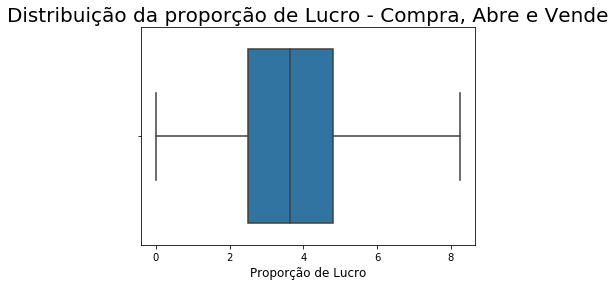

In [35]:
ax = sns.boxplot(dados_reais['% C-B'], showfliers=False)
ax.set_title('Distribuição da proporção de Lucro - Compra, Abre e Vende', fontsize=20)
ax.set_xlabel('Proporção de Lucro', fontsize=12)
ax

### O interessante desta análise é que a grande maioria da informação coletada diz que o Boosters estão em sua grande maioria dando um lucro de mais do que o dobro